In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
from sklearn.linear_model import LinearRegression

In [4]:
#folder = "/Users/cdesio/UoB/DARK-LANA/Dark/Field_10x10"
folder = "/Users/yw18581/DARK-LANA/Dark/Field_10x10"


In [5]:
fnames = sorted(os.listdir(folder))

In [6]:
def groupby(X, y, key="max"):
    y = np.asarray(y)
    X = np.asarray(X)
    y_uniques = np.unique(y)
    if key=="max":
        y_out = [np.max(X[y==yi]) for yi in y_uniques]
    elif key=="min":
        y_out = [np.min(X[y==yi]) for yi in y_uniques]
    return y_uniques, y_out

In [78]:
def field_rotation(fname):
    img = imread(os.path.join(folder, fname))
    init_ls =  checkerboard_level_set(img.shape, 5)
    ls = morphological_chan_vese(img, 12, init_level_set=init_ls, smoothing=6)
    contour = [np.nonzero(ls)[0], np.nonzero(ls)[1]]
    cut = ls[500:750,600:1700]
    a = np.argwhere(cut)
    x, y = groupby(a[:,0],a[:,1])
    if np.all(np.ravel(y)>=398):
        print("let's try min")
        x,y = groupby(a[:,0],a[:,1], key='min')
        x_new =np.asarray(x).reshape(-1,1)
        model = LinearRegression()
        model.fit(x_new, y)
        r_sq = model.score(x_new, y)
        intercept = model.intercept_
        slope = model.coef_
    else: 
        x_new =np.asarray(x).reshape(-1,1)
        model = LinearRegression()
        model.fit(x_new, y)
        r_sq = model.score(x_new, y)
        intercept = model.intercept_
        slope = model.coef_
    return r_sq, intercept, slope

In [16]:
img = imread(os.path.join(folder, fnames[0]))

In [41]:
init_ls =  checkerboard_level_set(img.shape, 5)
ls = morphological_chan_vese(img, 12, init_level_set=init_ls, smoothing=6)

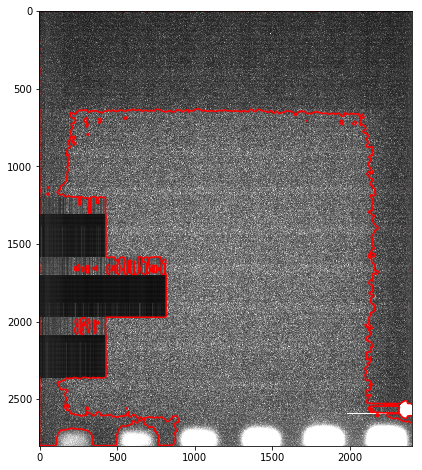

In [42]:
show_img_cont(img,ls)

In [33]:
iterations = np.arange(2,20,2)

In [36]:
smoothings = np.arange(2,20,2)

iterations: 2, smoothing: 2


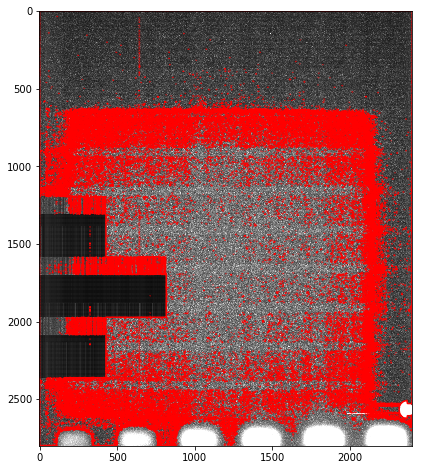

iterations: 4, smoothing: 4


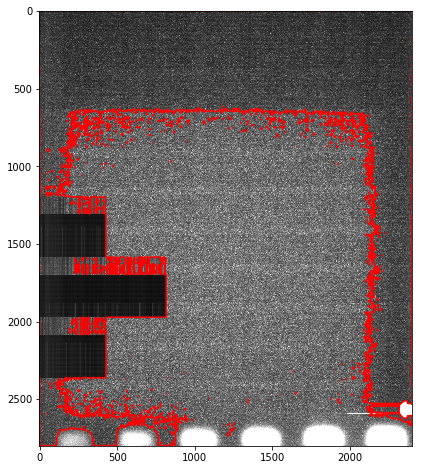

iterations: 6, smoothing: 6


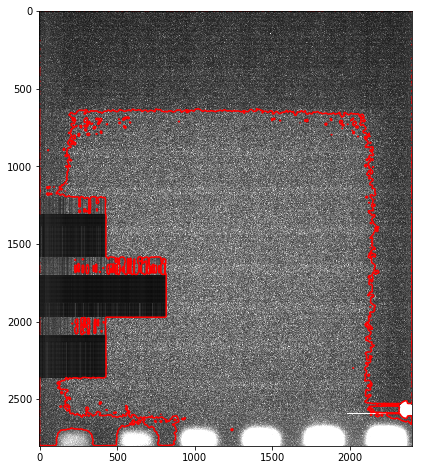

iterations: 8, smoothing: 8


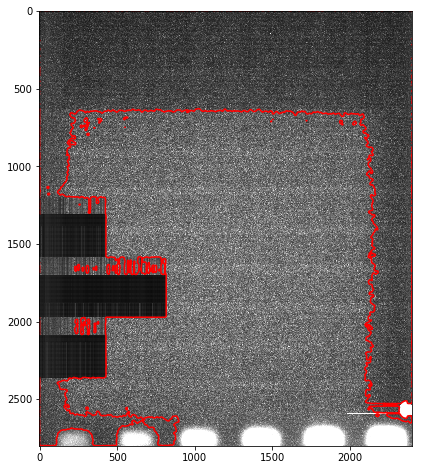

iterations: 10, smoothing: 10


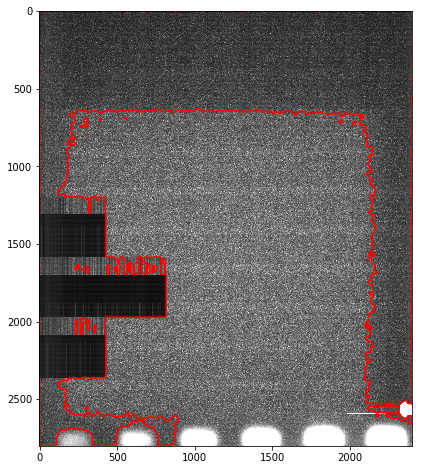

iterations: 12, smoothing: 12


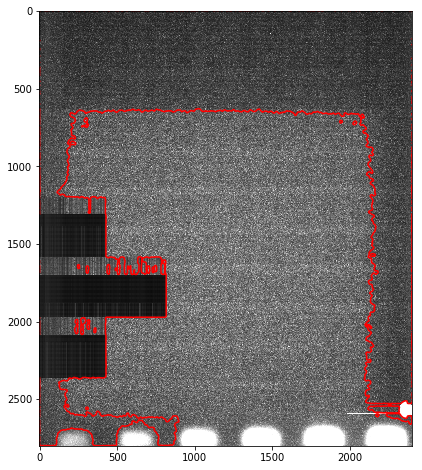

iterations: 14, smoothing: 14


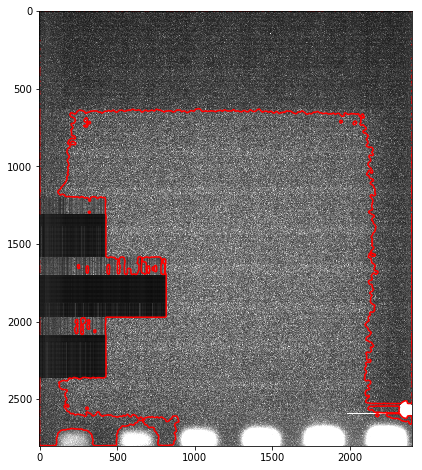

iterations: 16, smoothing: 16


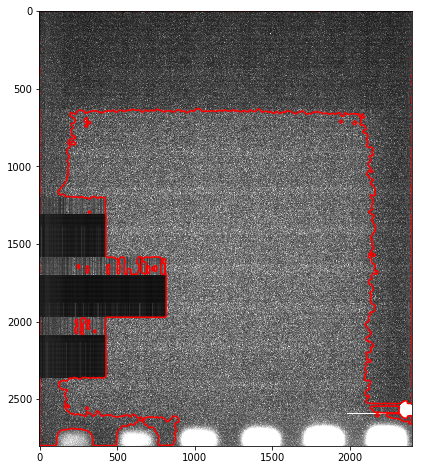

iterations: 18, smoothing: 18


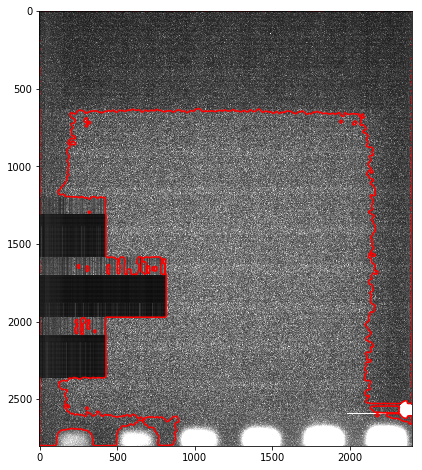

In [39]:
init_ls =  checkerboard_level_set(img.shape, 5)
for it, sm in zip(iterations, smoothings):
    print("iterations: {}, smoothing: {}".format(it, sm))
    ls = morphological_chan_vese(img, it, init_level_set=init_ls, smoothing=sm)
    show_img_cont(img,ls)
    

iterations: 12, smoothing: 2


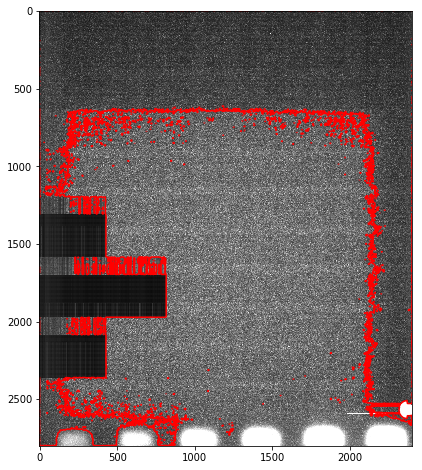

iterations: 12, smoothing: 4


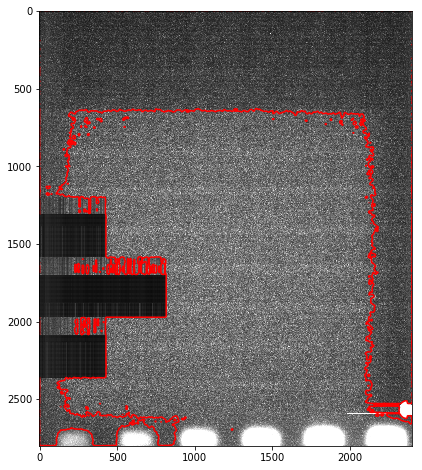

iterations: 12, smoothing: 6


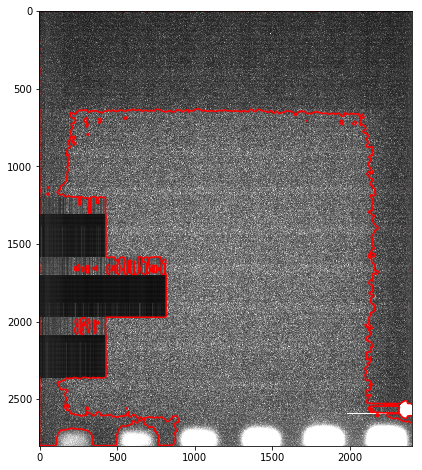

iterations: 12, smoothing: 8


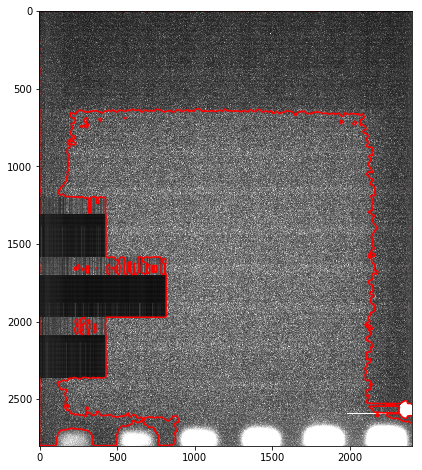

iterations: 12, smoothing: 10


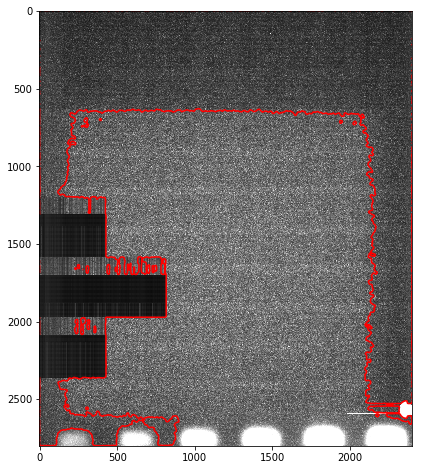

iterations: 12, smoothing: 12


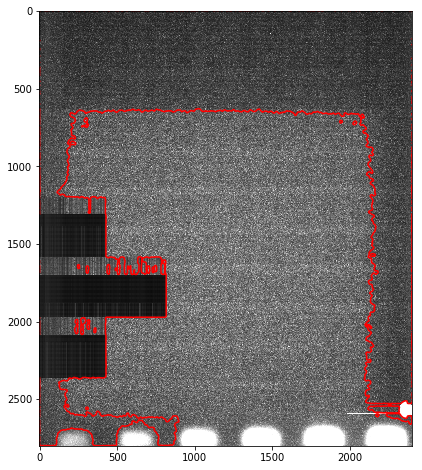

iterations: 12, smoothing: 14


KeyboardInterrupt: 

In [40]:
init_ls =  checkerboard_level_set(img.shape, 5)
for sm in smoothings:
    print("iterations: 12, smoothing: {}".format(sm))
    ls = morphological_chan_vese(img, 12, init_level_set=init_ls, smoothing=sm)
    show_img_cont(img,ls)
    

In [68]:
contour = [np.nonzero(ls)[0], np.nonzero(ls)[1]]

In [19]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    #ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return

In [79]:
cut = ls[500:750,400:1800]

In [ ]:
plt.contour(cut,[0.5])
#plt.xlim(300,2000)
plt.ylim(250,0)

In [71]:
cut = ls[500:750,600:1700]


In [72]:
a = np.argwhere(cut)

In [73]:
x_new, y_new = groupby(a[:,0],a[:,1])

(300, 0)

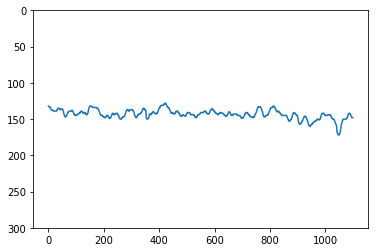

In [74]:
plt.plot(x_new,y_new)
plt.ylim(300,0)

In [75]:
x_new =np.asarray(x_new).reshape(-1,1)
model = LinearRegression()
model.fit(x_new, y_new)
r_sq = model.score(x_new, y_new)
intercept = model.intercept_
slope = model.coef_

In [76]:
intercept

137.7474015357939

In [77]:
np.rad2deg(np.arctan(slope[0]))

0.5781855791437941

In [79]:
r_sqs = []
intercepts = []
slopes = []
angles = []
for i,f in enumerate(fnames):
    print("file {}/{}".format(i, len(fnames)))
    rsq, inter, sl = field_rotation(f)
    r_sqs.append(rsq)
    intercepts.append(inter)
    slopes.append(sl)
    angles.append(np.rad2deg(np.arctan(sl)))
    print("done file {}".format(i))
print("done")

file 0/36
done file 0
file 1/36
done file 1
file 2/36
done file 2
file 3/36
done file 3
file 4/36
done file 4
file 5/36
done file 5
file 6/36
done file 6
file 7/36
done file 7
file 8/36
done file 8
file 9/36
done file 9
file 10/36
done file 10
file 11/36
done file 11
file 12/36
done file 12
file 13/36
done file 13
file 14/36
done file 14
file 15/36
done file 15
file 16/36
done file 16
file 17/36
done file 17
file 18/36
done file 18
file 19/36
done file 19
file 20/36
done file 20
file 21/36
done file 21
file 22/36
done file 22
file 23/36
done file 23
file 24/36
done file 24
file 25/36
done file 25
file 26/36
done file 26
file 27/36
done file 27
file 28/36
done file 28
file 29/36
done file 29
file 30/36
done file 30
file 31/36
done file 31
file 32/36
done file 32
file 33/36
done file 33
file 34/36
done file 34
file 35/36
done file 35
done


In [80]:
r_sqs

[0.24648285931399005,
 0.023234272585805238,
 0.04689810526239069,
 0.02660936413394177,
 0.0644227381456769,
 0.11967809972302768,
 0.004775327656423745,
 1.0,
 0.1256035540581001,
 0.22090518841856366,
 1.0,
 0.020210551551716024,
 1.0,
 0.16861750436545297,
 0.2482390411429446,
 0.00023807347642612608,
 0.05273489540272047,
 0.0886491609979929,
 0.015323163215661961,
 0.21222805112314924,
 0.09886831369682758,
 0.008793144851805601,
 0.03172737494606781,
 0.010185377585494648,
 0.13481824624345218,
 0.09239870751695843,
 0.11716278154294402,
 0.1585869418815562,
 0.15369768960620422,
 0.000965961978614982,
 0.18456726107927124,
 0.00019578349436266684,
 0.006552654235129074,
 0.009891711755074306,
 1.0,
 0.15283433032894145]

In [81]:
intercepts


[137.7474015357939,
 154.7110279910825,
 152.53236066385932,
 153.997488233837,
 149.76753529848898,
 137.988218974486,
 248.3550554465135,
 249.0,
 148.48958137230616,
 136.6309685409958,
 249.0,
 248.08866980431011,
 249.0,
 146.13694822888283,
 134.5414565271241,
 248.695159772108,
 149.26645033440673,
 148.73506564280405,
 249.18763933614068,
 147.0310824869953,
 148.7537676492445,
 152.17816200148624,
 150.21962843695812,
 141.23805300966063,
 149.12951201387168,
 149.173926182809,
 149.26259598711914,
 136.204840227892,
 149.0861233589299,
 247.95513572594373,
 147.1770274956651,
 248.5033242506812,
 246.7780348141192,
 152.44001486252168,
 249.0,
 146.6617389150359]

In [82]:
slopes

[array([0.01009158]),
 array([0.00402493]),
 array([0.00538573]),
 array([0.0038163]),
 array([0.00349692]),
 array([0.01226728]),
 array([0.00052692]),
 array([0.]),
 array([0.00765731]),
 array([0.00839265]),
 array([0.]),
 array([0.00115554]),
 array([0.]),
 array([0.0060805]),
 array([0.01499776]),
 array([7.49842844e-05]),
 array([0.00753066]),
 array([0.00618981]),
 array([-0.00259311]),
 array([0.00970437]),
 array([0.00805005]),
 array([0.0019638]),
 array([0.00222915]),
 array([0.00373421]),
 array([0.01017874]),
 array([0.0099424]),
 array([0.00978103]),
 array([0.00736153]),
 array([0.01211558]),
 array([0.00029744]),
 array([0.01230585]),
 array([0.0001081]),
 array([0.00152701]),
 array([0.00273469]),
 array([0.]),
 array([0.00927965])]

In [83]:

angles

[array([0.57818558]),
 array([0.23061028]),
 array([0.3085765]),
 array([0.21865686]),
 array([0.20035774]),
 array([0.70282828]),
 array([0.03019045]),
 array([0.]),
 array([0.43872292]),
 array([0.48085188]),
 array([0.]),
 array([0.06620726]),
 array([0.]),
 array([0.34838257]),
 array([0.8592441]),
 array([0.00429628]),
 array([0.43146661]),
 array([0.35464519]),
 array([-0.14857373]),
 array([0.55600226]),
 array([0.4612242]),
 array([0.11251758]),
 array([0.12772058]),
 array([0.21395333]),
 array([0.58317846]),
 array([0.56963855]),
 array([0.56039395]),
 array([0.42177688]),
 array([0.69413783]),
 array([0.01704207]),
 array([0.70503756]),
 array([0.00619389]),
 array([0.08749111]),
 array([0.15668583]),
 array([0.]),
 array([0.53166978])]